# Setup SST Plots

Working area to make reproducable and quick plots for monthly SST anomalies.

Want a global projection and each pole showing anomalies. Then row below will be what percentage of *absolute* temperatures they fall in

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import esmtools as et
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

# Ocean stuff

https://www.esrl.noaa.gov/psd/data/gridded/data.cobe.html#plot


In [55]:
ds = xr.open_dataset('/Users/ribr5703/Downloads/sst.mon.mean.nc')

In [56]:
ds = ds['sst']

In [68]:
len(ds.time) - (2018 - 1891)*12

5

In [63]:
ds['time'] = pd.date_range('1891-01', '2018-06', freq='M')

In [77]:
# Create anomalies.
clim = ds.sel(time=slice('1891-01', '1920-12')).groupby('time.month').mean('time')
anom = ds.groupby('time.month') - clim

In [93]:
data = anom.sel(time='2018-05').squeeze()
cyclic_data, cyclic_lons = add_cyclic_point(data.values, coord=data.lon.values)

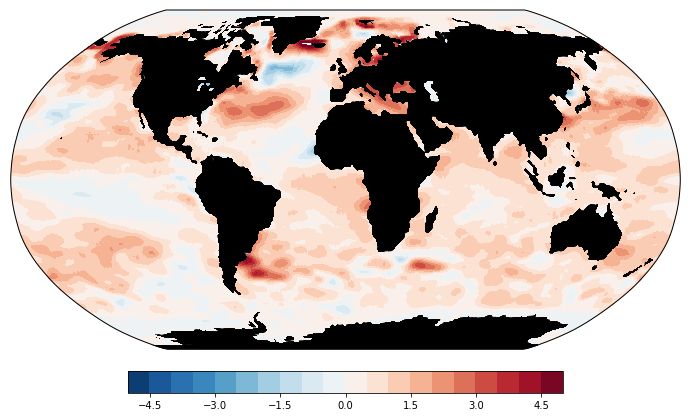

In [94]:
f, ax = et.vis.make_cartopy(grid_lines=False)
#p = ax.pcolormesh(ds.lon,ds.lat,anom.sel(time='2018-05').squeeze(),transform=ccrs.PlateCarree(),
#             vmin=-5, vmax=5, cmap='RdBu_r')
p = ax.contourf(cyclic_lons, ds.lat, cyclic_data, np.arange(-5, 5.5, 0.5), 
               transform=ccrs.PlateCarree(), cmap="RdBu_r")

plt.colorbar(p, orientation='horizontal',pad=0.05,fraction=0.05)

# South Pole

In [102]:
ds_polar = anom.sel(lat=slice(-30,-90), time='2018-05').squeeze()
cyclic_data, cyclic_lons = add_cyclic_point(ds_polar.values, coord=ds_polar.lon.values)

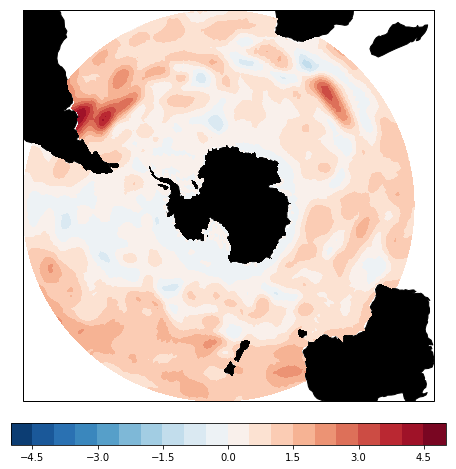

In [106]:
f, ax = et.vis.make_cartopy(grid_lines=False, projection=ccrs.SouthPolarStereo())
#p = ax.pcolormesh(cyclic_lons, ds_polar.lat, ds_polar,transform=ccrs.PlateCarree(),
#             vmin=-3, vmax=3, cmap='RdBu_r')
p = ax.contourf(cyclic_lons, ds_polar.lat, cyclic_data, np.arange(-5, 5.5, 0.5), 
               transform=ccrs.PlateCarree(), cmap="RdBu_r")
plt.colorbar(p, orientation='horizontal',pad=0.05,fraction=0.05)

# North Pole

In [122]:
ds_north = anom.where(anom.lat > 60, drop=True).sel(time='2018-05').squeeze()
cyclic_data, cyclic_lons = add_cyclic_point(ds_north.values, coord=ds_north.lon.values)

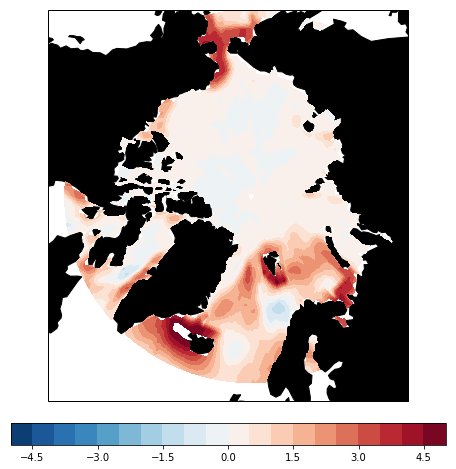

In [123]:
f, ax = et.vis.make_cartopy(grid_lines=False, projection=ccrs.NorthPolarStereo())
#p = ax.pcolormesh(cyclic_lons, ds_polar.lat, ds_polar,transform=ccrs.PlateCarree(),
#             vmin=-3, vmax=3, cmap='RdBu_r')
p = ax.contourf(cyclic_lons, ds_north.lat, cyclic_data, np.arange(-5, 5.5, 0.5), 
               transform=ccrs.PlateCarree(), cmap="RdBu_r")
plt.colorbar(p, orientation='horizontal',pad=0.05,fraction=0.05)